In [46]:
from herbie import Herbie

# generate a random string
import random

In [52]:
rand_str = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=10))
print(rand_str)
H = Herbie(
    "20190207 0000",
    model="hrrr",
    product="prs",
    fxx=1,
    save_dir=f"~/{rand_str}_herbie/"
)

catahzdtmf
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2019-Feb-07 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws


In [53]:
ds = H.xarray("MSLMA:mean sea level")
# print(ds.to_array())
print(ds)
numpy_array = ds.to_array().values[0]

print(numpy_array.shape)


👨🏻‍🏭 Created directory: [/home/v-xueruisu/catahzdtmf_herbie/hrrr/20190207]


<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2019-02-07
    step                 timedelta64[ns] 01:00:00
    meanSea              float64 0.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2019-02-07T01:00:00
Dimensions without coordinates: y, x
Data variables:
    mslma                (y, x) float32 1.019e+05 1.019e+05 ... 1.025e+05
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 prs
    description:             High-Resolution Rapid Refresh - CONU

In [54]:
rand_str = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=10))
print(rand_str)
H_real = Herbie(
    "20190207 0100",
    model="hrrr",
    product="prs",
    fxx=0,
    save_dir=f"~/{rand_str}_herbie/"
)

isflqvxrlu
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2019-Feb-07 01:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [55]:
ds_real = H_real.xarray("MSLMA:mean sea level")
# print(ds.to_array())
print(ds_real)
numpy_array_real = ds_real.to_array().values[0]

print(numpy_array_real.shape)

👨🏻‍🏭 Created directory: [/home/v-xueruisu/isflqvxrlu_herbie/hrrr/20190207]


<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2019-02-07T01:00:00
    step                 timedelta64[ns] 00:00:00
    meanSea              float64 0.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2019-02-07T01:00:00
Dimensions without coordinates: y, x
Data variables:
    mslma                (y, x) float32 1.019e+05 1.019e+05 ... 1.025e+05
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 prs
    description:             High-Resolution Rapid Refre

In [56]:
import numpy as np
def RMSE(target, pre):
    return np.sqrt(((pre - target)**2).mean())


In [57]:
RMSE(numpy_array, numpy_array_real)

69.15127140305192

In [58]:
print(numpy_array[0, :10], numpy_array_real[0, :10])

[101944.0 101944.0 101944.0 101944.0 101944.0 101944.0 101944.0 101944.0
 101944.0 101944.0] [101910.0 101912.0 101914.0 101915.0 101917.0 101919.0 101920.0 101922.0
 101923.0 101924.0]


In [59]:
target_all = np.load("/weather-blob/data/hrrr/hourly2_fixed_TMP_L103/2019020701.npy")
input_all = np.load("/weather-blob/data/hrrr/hourly2_fixed_TMP_L103/2019020700.npy")


In [60]:
print(RMSE(target_all[0, 0], numpy_array_real))

0.0


In [19]:
print(target_all.shape)

(1, 69, 1059, 1799)


In [61]:
RMSE(target_all[0, 0], input_all[0, 0])

70.360085

In [75]:

import pandas as pd
from herbie import FastHerbie
from concurrent.futures import ThreadPoolExecutor,as_completed
import torch

single_vars = ["msl", "2t", "10u", "10v"]
atmos_vars = ["hgtn", "u", "v", "t", "q"]
atmos_levels = [5000., 10000., 15000., 20000.,
                25000., 30000., 40000., 50000.,
                60000., 70000., 85000., 92500.,
                100000.]
# all_stds = torch.tensor(ALL_STDS[PICKED_IDX])
var_name = single_vars + [f"{v}_{int(p/100)}" for v in atmos_vars for p in atmos_levels]
var_name = np.array(var_name)
 
def load_variable(H_pre,searchString):
    return H_pre.xarray(searchString).to_array().values[0]
 
def multi_core(H_pre,var_name,max_workers=32):
    results = {}
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_variable = {executor.submit(load_variable, H_pre, var): var for var in var_name}
        for future in as_completed(future_to_variable):
            variable = future_to_variable[future]
            try:
                data = future.result()
                results[variable] = data
            except Exception as exc:
                print(f'{variable} generated an exception: {exc}')
    return results
 
def _load_files_herbie(filenames,files,var_name=var_name,lead_time=1):
    herbie_maps = {'hgtn': 'HGT',
    'u': 'UGRD',
    'v': 'VGRD',
    't': 'TMP',
    'q': 'SPFH',
    'msl': 'MSLMA:mean sea level',
    '2t': 'TMP:2 m above',
    '10u': 'UGRD:10 m above',
    '10v': 'VGRD:10 m above'}
    filenames = [f for f in filenames if f not in files.keys()]
    #filenames = ['2019051108.npy', '2019051109.npy', '2019051110.npy']
    if len(filenames)==0:
        return files
    datetimes = [filename.split('.')[0] for filename in filenames]
    datetimes = [pd.to_datetime(i, format='%Y%m%d%H%M') for i in datetimes]
    H_pre = FastHerbie(datetimes, model="hrrr", fxx=[lead_time],product='prs',max_threads=50)
    new_var_names = []
    for f in filenames:
        files[f] = np.zeros([1,69,1059,1799])
    for var in var_name:
        if var in ['msl','2t','10u','10v']:
            new_var_names.append(herbie_maps[var])
        else:
            var,level_ = var.split('_')
            searchString = f"{herbie_maps[var]}:{level_} mb"
            new_var_names.append(searchString)
    pre_array = multi_core(H_pre,new_var_names)
    for i,var in enumerate(new_var_names):
        for j,f in enumerate(filenames):
            files[f][0,i] = pre_array[var][j]
    print(new_var_names)
    return files
 
nwp_files = {}
filename = '201902070000.npy'
hrrr_root = "/home/v-nianran/blob/kmsw0eastau/data/hrrr/hourly2_fixed_TMP_L103"
#gt_file = np.load(os.path.join(hrrr_root,filename))
_load_files_herbie(['201902070000.npy','201902070000.npy'],nwp_files,var_name,lead_time=1)
gt_files = {}
_load_files_herbie(['201902070100.npy','201902070100.npy'],gt_files,var_name,lead_time=0)
gt_file = gt_files['201902070100.npy']
nwp_file = nwp_files[filename] #1,69,320,320 var_name




Could not connect to database


['MSLMA:mean sea level', 'TMP:2 m above', 'UGRD:10 m above', 'VGRD:10 m above', 'HGT:50 mb', 'HGT:100 mb', 'HGT:150 mb', 'HGT:200 mb', 'HGT:250 mb', 'HGT:300 mb', 'HGT:400 mb', 'HGT:500 mb', 'HGT:600 mb', 'HGT:700 mb', 'HGT:850 mb', 'HGT:925 mb', 'HGT:1000 mb', 'UGRD:50 mb', 'UGRD:100 mb', 'UGRD:150 mb', 'UGRD:200 mb', 'UGRD:250 mb', 'UGRD:300 mb', 'UGRD:400 mb', 'UGRD:500 mb', 'UGRD:600 mb', 'UGRD:700 mb', 'UGRD:850 mb', 'UGRD:925 mb', 'UGRD:1000 mb', 'VGRD:50 mb', 'VGRD:100 mb', 'VGRD:150 mb', 'VGRD:200 mb', 'VGRD:250 mb', 'VGRD:300 mb', 'VGRD:400 mb', 'VGRD:500 mb', 'VGRD:600 mb', 'VGRD:700 mb', 'VGRD:850 mb', 'VGRD:925 mb', 'VGRD:1000 mb', 'TMP:50 mb', 'TMP:100 mb', 'TMP:150 mb', 'TMP:200 mb', 'TMP:250 mb', 'TMP:300 mb', 'TMP:400 mb', 'TMP:500 mb', 'TMP:600 mb', 'TMP:700 mb', 'TMP:850 mb', 'TMP:925 mb', 'TMP:1000 mb', 'SPFH:50 mb', 'SPFH:100 mb', 'SPFH:150 mb', 'SPFH:200 mb', 'SPFH:250 mb', 'SPFH:300 mb', 'SPFH:400 mb', 'SPFH:500 mb', 'SPFH:600 mb', 'SPFH:700 mb', 'SPFH:850 mb', 'S

In [76]:
RMSE(gt_file[0, 0], nwp_file[0, 0])

69.15127140305192

In [68]:
var_name

array(['msl', '2t', '10u', '10v', 'hgtn_50', 'hgtn_100', 'hgtn_150',
       'hgtn_200', 'hgtn_250', 'hgtn_300', 'hgtn_400', 'hgtn_500',
       'hgtn_600', 'hgtn_700', 'hgtn_850', 'hgtn_925', 'hgtn_1000',
       'u_50', 'u_100', 'u_150', 'u_200', 'u_250', 'u_300', 'u_400',
       'u_500', 'u_600', 'u_700', 'u_850', 'u_925', 'u_1000', 'v_50',
       'v_100', 'v_150', 'v_200', 'v_250', 'v_300', 'v_400', 'v_500',
       'v_600', 'v_700', 'v_850', 'v_925', 'v_1000', 't_50', 't_100',
       't_150', 't_200', 't_250', 't_300', 't_400', 't_500', 't_600',
       't_700', 't_850', 't_925', 't_1000', 'q_50', 'q_100', 'q_150',
       'q_200', 'q_250', 'q_300', 'q_400', 'q_500', 'q_600', 'q_700',
       'q_850', 'q_925', 'q_1000'], dtype='<U9')

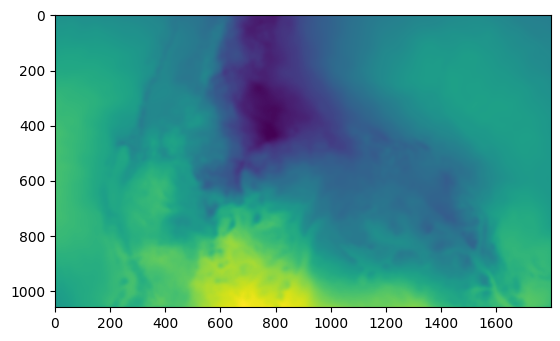

In [77]:
import matplotlib.pyplot as plt

plt.imshow(gt_file[0, 0])

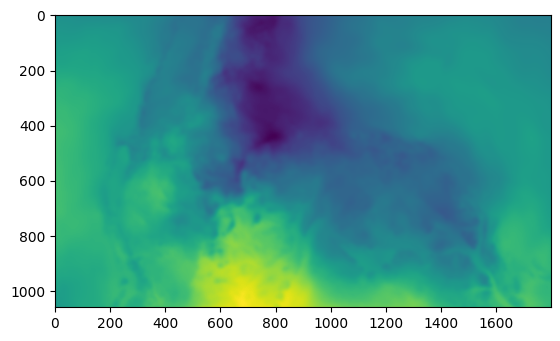

In [78]:
plt.imshow(nwp_file[0, 0])

In [79]:
numpy_array_real.shape

(1059, 1799)

0.0
0.0


True


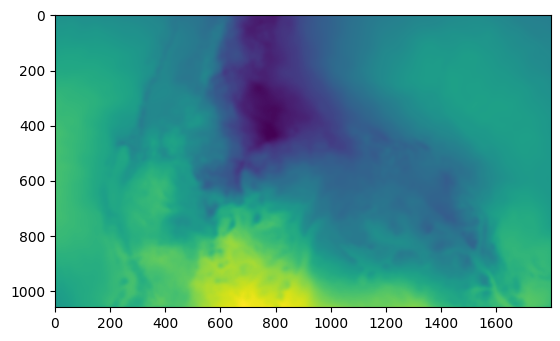

In [81]:
plt.imshow(np.array(numpy_array_real, dtype=np.float32))
# gt_file, nwp_file, numpy_array_real, numpy_array
print(RMSE(gt_file[0, 0], numpy_array_real))
print(RMSE(nwp_file[0, 0], numpy_array))
print((gt_file[0, 0] == numpy_array_real).sum() == 1059*1799)